In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [2]:
df=pd.read_excel('D:\MAJOR PROJECT\sample.xlsx')

In [3]:
df.head()

BQ  ESS       BMI  Weight  Height  Head  Neck  Waist  Buttock  Age  M  \
0   0   14  29.06593      88     174  57.5    39     96      106   20  1   
1   0    8  26.98962      78     170  57.0    36     90      100   20  1   
2   0   16  23.93948      75     177  59.0    39     88      104   20  1   
3   0   15  22.12974      67     174  57.0    35     74       94   20  1   
4   0   15  22.12974      67     174  57.0    35     74       94   20  1   

   status  
0       0  
1       0  
2       0  
3       0  
4       0

In [4]:
df.shape

(11536, 12)

In [5]:
df

BQ  ESS       BMI  Weight  Height  Head  Neck  Waist  Buttock  Age  M  \
0       0   14  29.06593      88     174  57.5    39     96      106   20  1   
1       0    8  26.98962      78     170  57.0    36     90      100   20  1   
2       0   16  23.93948      75     177  59.0    39     88      104   20  1   
3       0   15  22.12974      67     174  57.0    35     74       94   20  1   
4       0   15  22.12974      67     174  57.0    35     74       94   20  1   
...    ..  ...       ...     ...     ...   ...   ...    ...      ...  ... ..   
11531   0   16  29.48650      99     183  57.1    42    111      109   56  1   
11532   0   11  25.07382      66     162  55.1    36     91       96   61  1   
11533   0    6  28.66613      96     183  58.0    39     99      108   36  1   
11534   0   15  28.73175      85     172  60.2    40    103      105   63  1   
11535   0    1  45.26355     140     176  61.0    46    146      132   43  1   

       status  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
11531       3  
11532       3  
11533       3  
11534       3  
11535       3  

[11536 rows x 12 columns]

In [6]:
p=df.drop('status',axis=1)
q=df['status']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (9228, 11)
y_train (9228,)
X_test (2308, 11)
y_test (2308,)


In [30]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  #precision    = precision_score(y_test, y_pred1)
 # recall       = recall_score(y_test, y_pred1)
 # f1score      = f1_score(y_test, y_pred1) 
 # rocauc       = roc_auc_score(y_test, y_pred1)
  #logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)
  classification=classification_report(y_test, y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)
  df_model2 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                           'classification':[classification],
                             #'precision'    : [precision],
                             #'recall'       : [recall],
                             #'f1score'      : [f1score],
                             #'rocauc'       : [rocauc],
                            # 'logloss'      : [logloss],
                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model2

In [31]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model11 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model11.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())
#print(model1)



base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 791 ms


In [32]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model12 = ExtraTreesClassifier(random_state=0)
base_model12.fit(X_train, y_train)
model12 = evaluate(base_model12,  X_test,  y_test, 'Extra Tree')
model12.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model12.get_params())

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 542 ms


In [33]:
%%time
time2=time.time()
print("base model")
base_model13 = LogisticRegression(random_state=0)
base_model13.fit(X_train, y_train)
model13 = evaluate(base_model13,  X_test,  y_test, 'Logistic Regression')
model13.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model13.get_params())

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Wall time: 382 ms


In [34]:
%%time
time2=time.time()
print("base model")
base_model14 = KNeighborsClassifier()
base_model14.fit(X_train, y_train)
model14 = evaluate(base_model14,  X_test,  y_test, 'KNN')
model14.timetaken[0] = time.time() - time2
print("KNN")
print(base_model14.get_params())

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Wall time: 89.2 ms


In [35]:
%%time
time2=time.time()
print("base model")
base_model15 = LinearSVC(random_state=0)
base_model15.fit(X_train, y_train)
model15 = evaluate(base_model15,  X_test,  y_test, 'LinearSVC')
model15.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model15.get_params())

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
Wall time: 1.33 s


In [36]:
%%time
time2=time.time()
print("base model")
base_model16 = GaussianNB()
base_model16.fit(X_train, y_train)
model16 = evaluate(base_model16,  X_test,  y_test, 'GaussianNB')
model16.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model16.get_params())

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
Wall time: 20.2 ms


In [37]:
%%time
time2=time.time()
print("base model")
base_model17=SVC(random_state=0)
base_model17.fit(X_train, y_train)
model17 = evaluate(base_model17,  X_test,  y_test, 'SVC')
model17.timetaken[0] = time.time() - time2
print("SVC")
print(base_model17.get_params())

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Wall time: 4.04 s


In [38]:
%%time
time2=time.time()
print("base model")
base_model18=DecisionTreeClassifier(random_state=0)
base_model18.fit(X_train, y_train)
model18 = evaluate(base_model18,  X_test,  y_test, 'Decision Tree')
model18.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model18.get_params())


base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
Wall time: 39.7 ms


In [39]:
df_base2= pd.concat([model11,model12,model13,model14,model15,model16,model17,model18],axis = 0).reset_index()
df_base2.drop('index', axis=1, inplace=True)
df_base2

model  accuracy  \
0         RandomForest  0.910745   
1           Extra Tree  0.909879   
2  Logistic Regression  0.538995   
3                  KNN  0.836222   
4            LinearSVC  0.449307   
5           GaussianNB  0.561092   
6                  SVC  0.555893   
7        Decision Tree  0.863951   

                                      classification  timetaken  \
0                precision    recall  f1-score   ...   0.791147   
1                precision    recall  f1-score   ...   0.542256   
2                precision    recall  f1-score   ...   0.381508   
3                precision    recall  f1-score   ...   0.089194   
4                precision    recall  f1-score   ...   1.325156   
5                precision    recall  f1-score   ...   0.020180   
6                precision    recall  f1-score   ...   4.043209   
7                precision    recall  f1-score   ...   0.039702   

                                     confusionmatrix  
0  [[486, 6, 2, 97], [0, 555, 0, 0], [0, 0, 572, ...  
1  [[489, 2, 1, 99], [1, 554, 0, 0], [0, 0, 572, ...  
2  [[178, 168, 110, 135], [102, 304, 103, 46], [5...  
3  [[355, 76, 42, 118], [0, 555, 0, 0], [0, 0, 57...  
4  [[20, 283, 11, 277], [10, 476, 0, 69], [0, 279...  
5  [[194, 222, 88, 87], [67, 422, 52, 14], [47, 1...  
6  [[160, 200, 129, 102], [26, 366, 123, 40], [26...  
7  [[430, 19, 8, 134], [6, 548, 0, 1], [1, 5, 566...

In [41]:
classifiers=[
DecisionTreeClassifier(random_state=0),
SVC(random_state=0),
LinearSVC(random_state=0),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(random_state=0),
RandomForestClassifier(random_state=0),
ExtraTreesClassifier(random_state=0)]

In [42]:
# libraries 
#!pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [46]:
classes =  ["Normal", "Mild","Moderate","Severe"]
classes

['Normal', 'Mild', 'Moderate', 'Severe']

In [47]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        visualizer.score(X_test, y_test)
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test,  x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [48]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

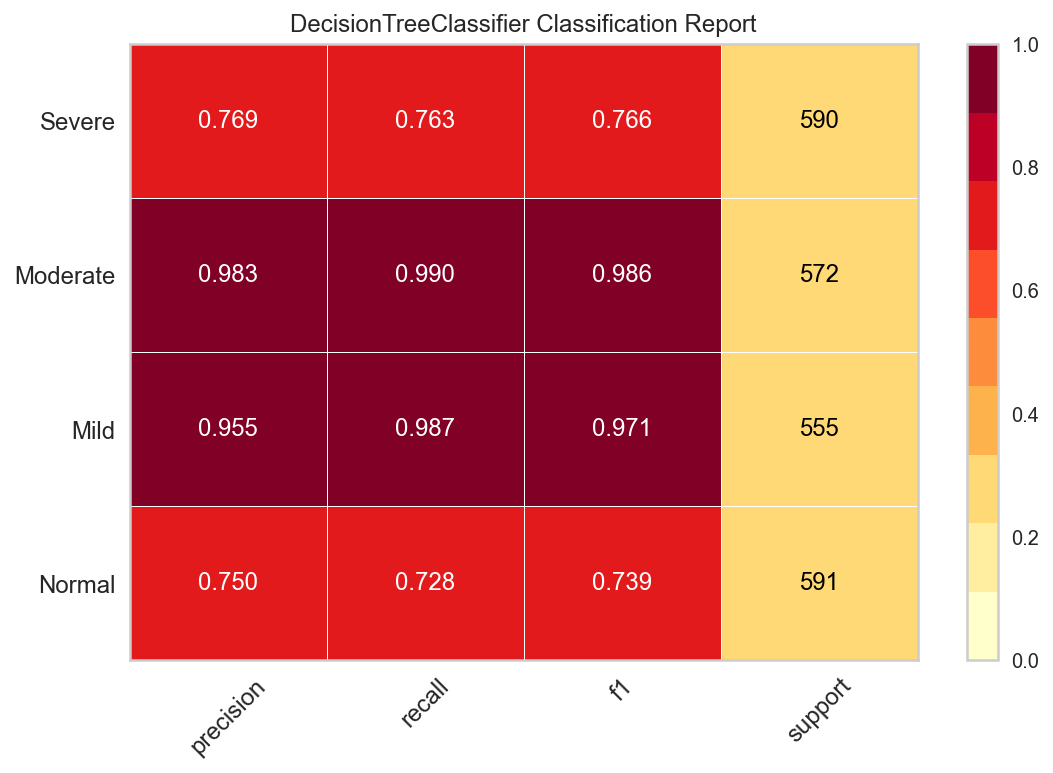

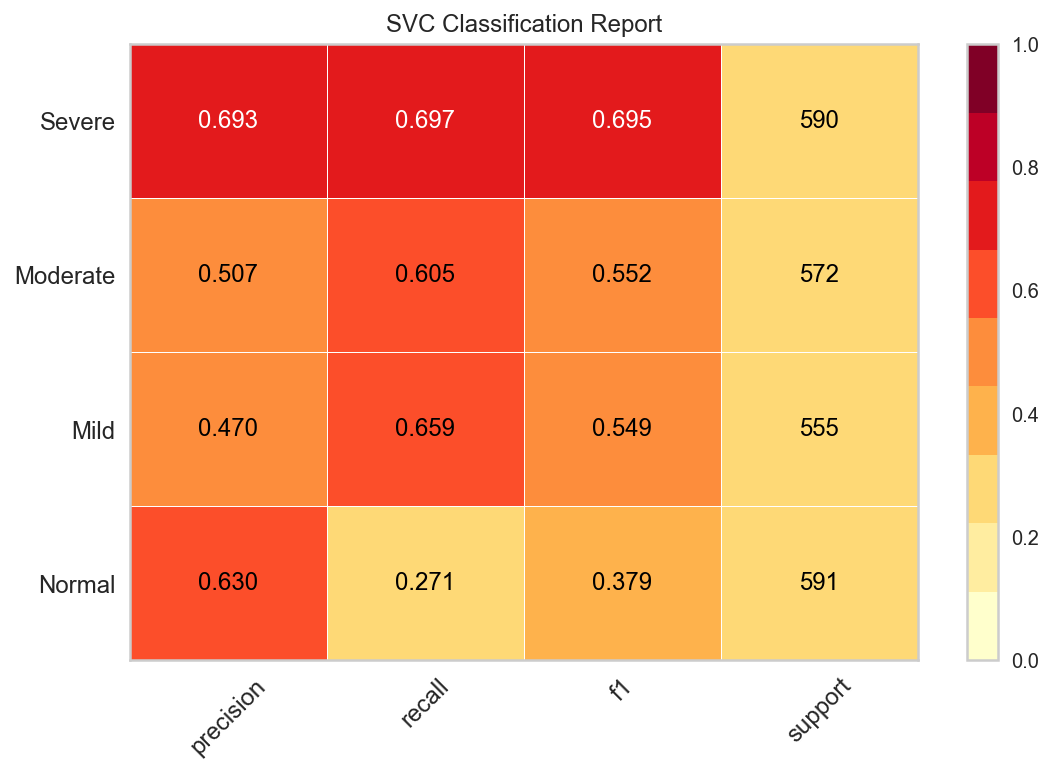

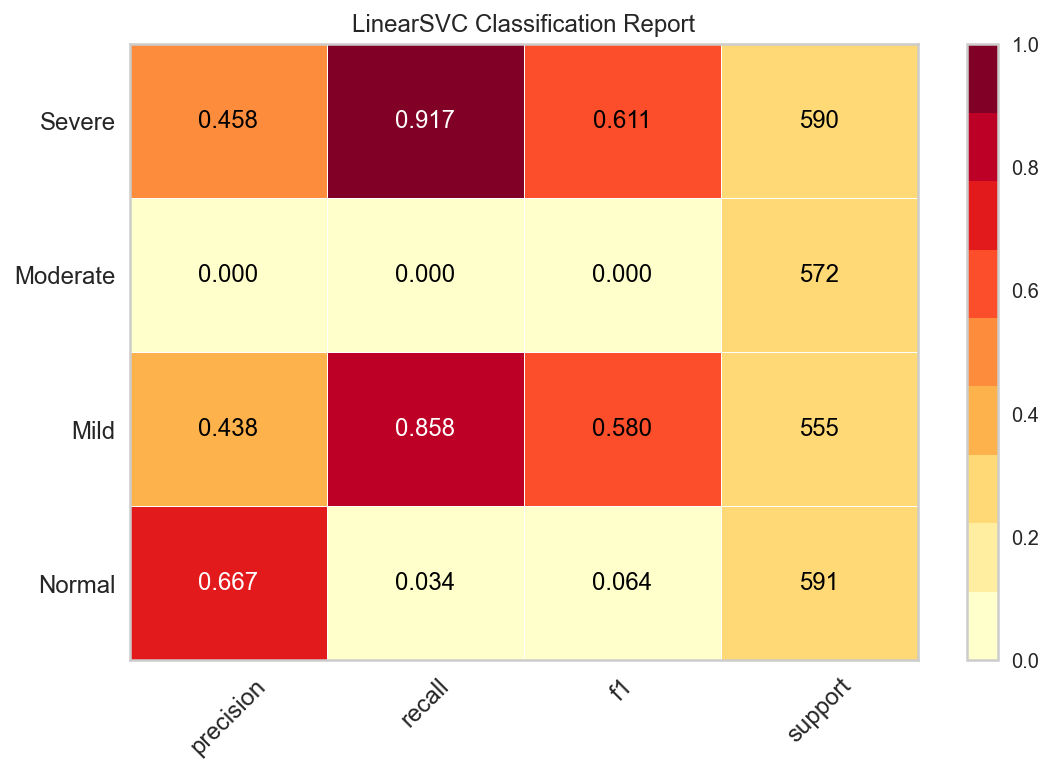

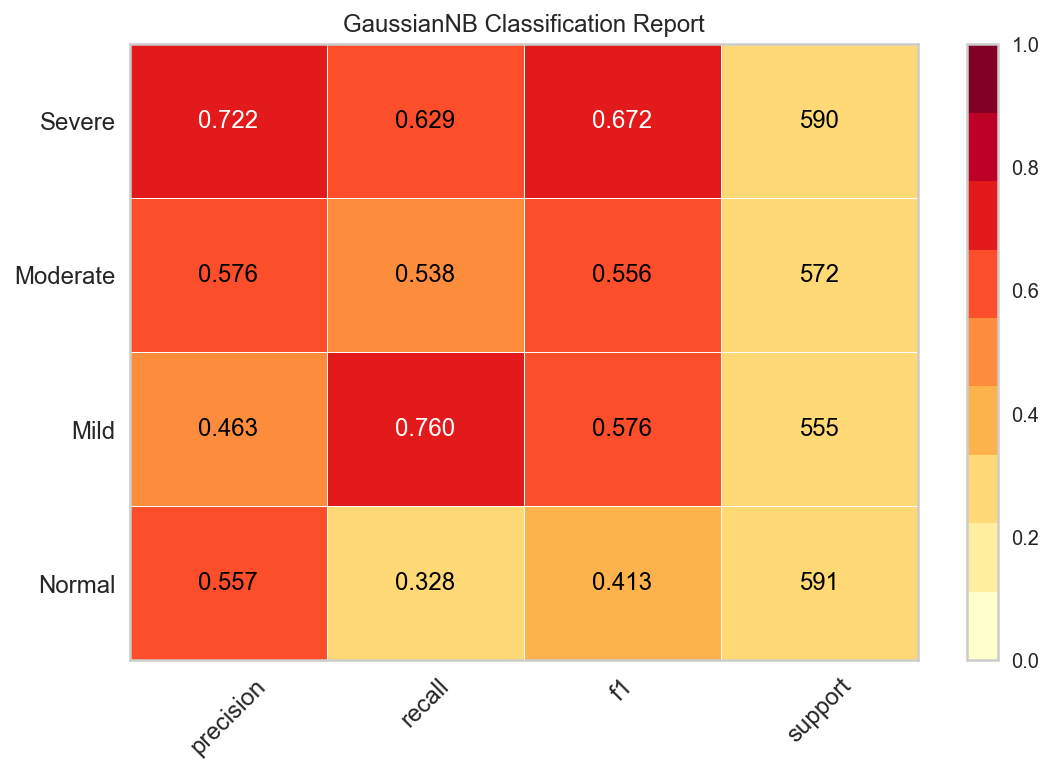

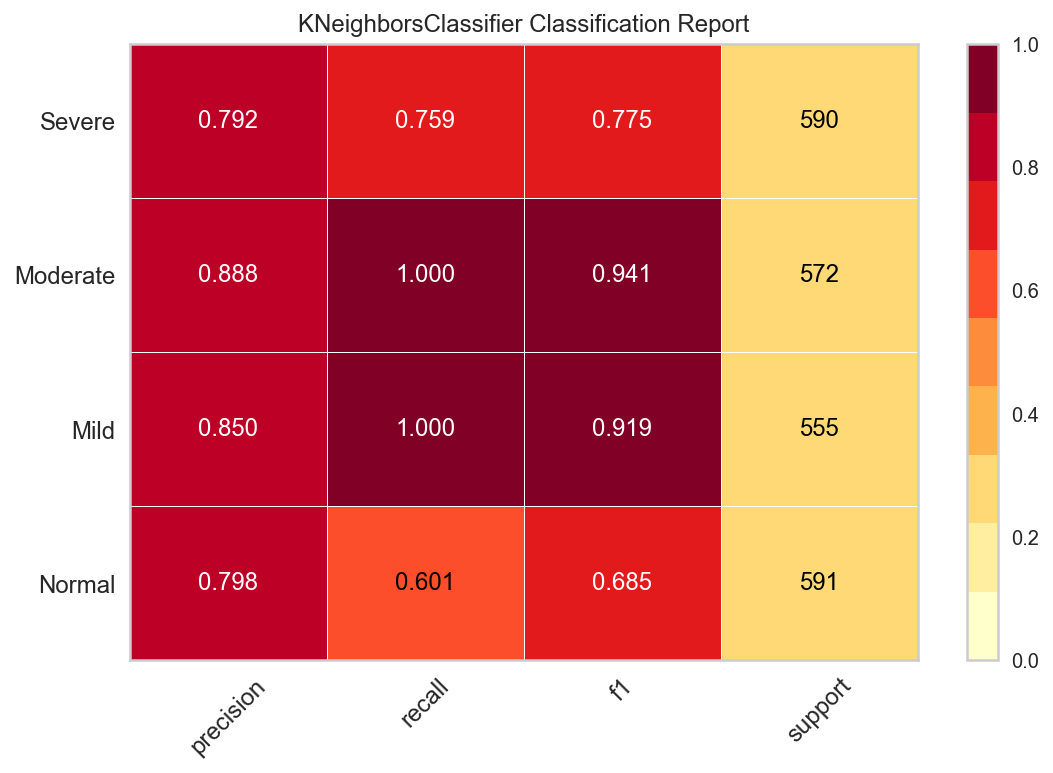

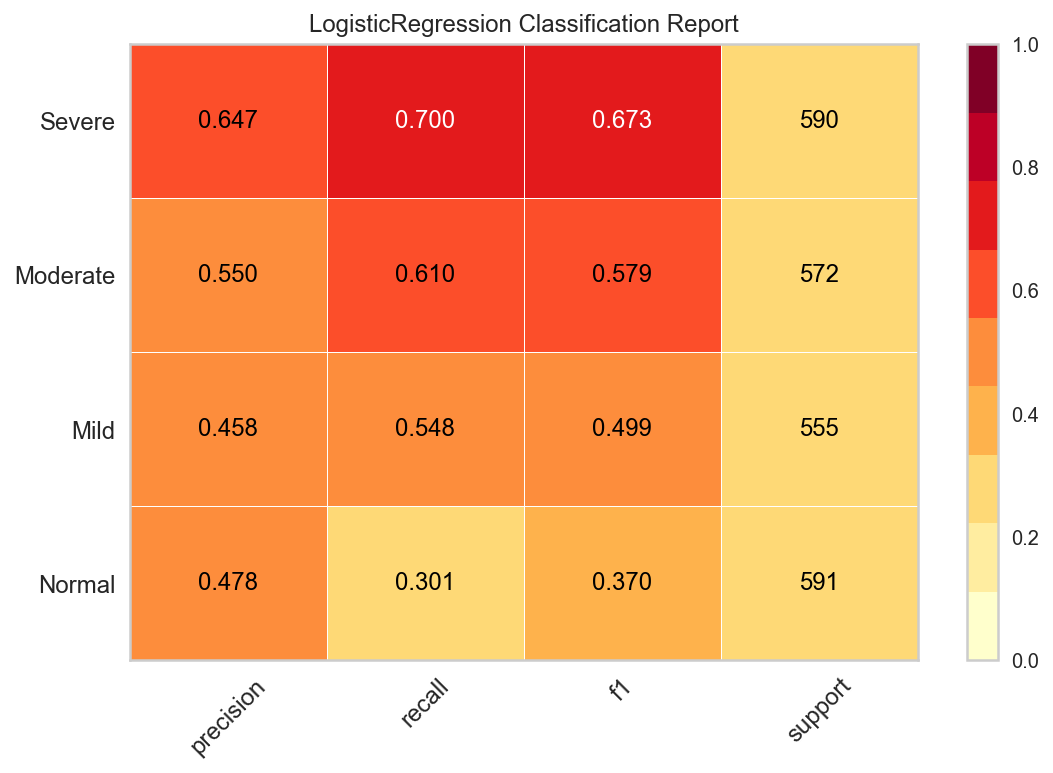

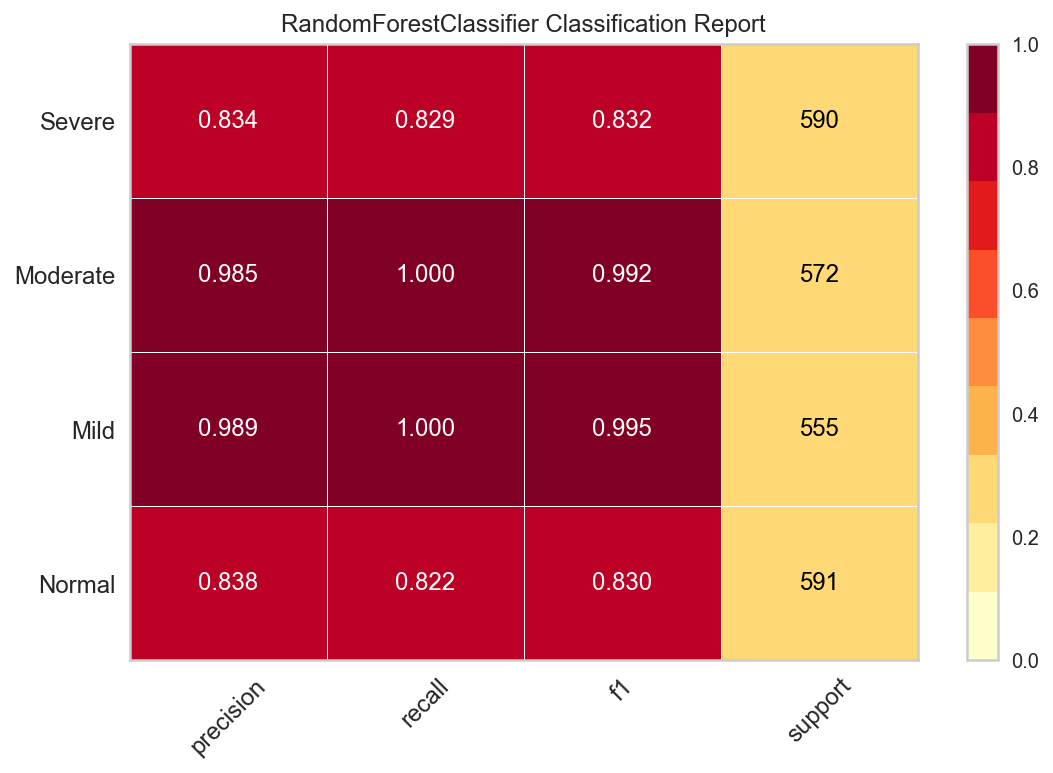

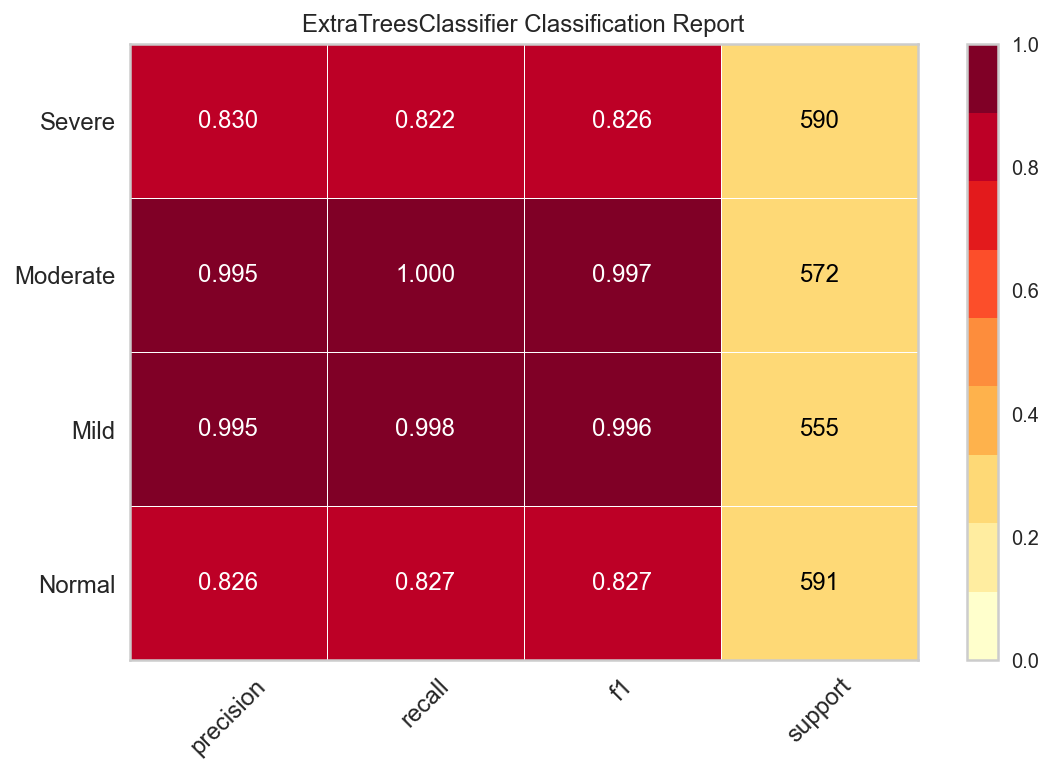

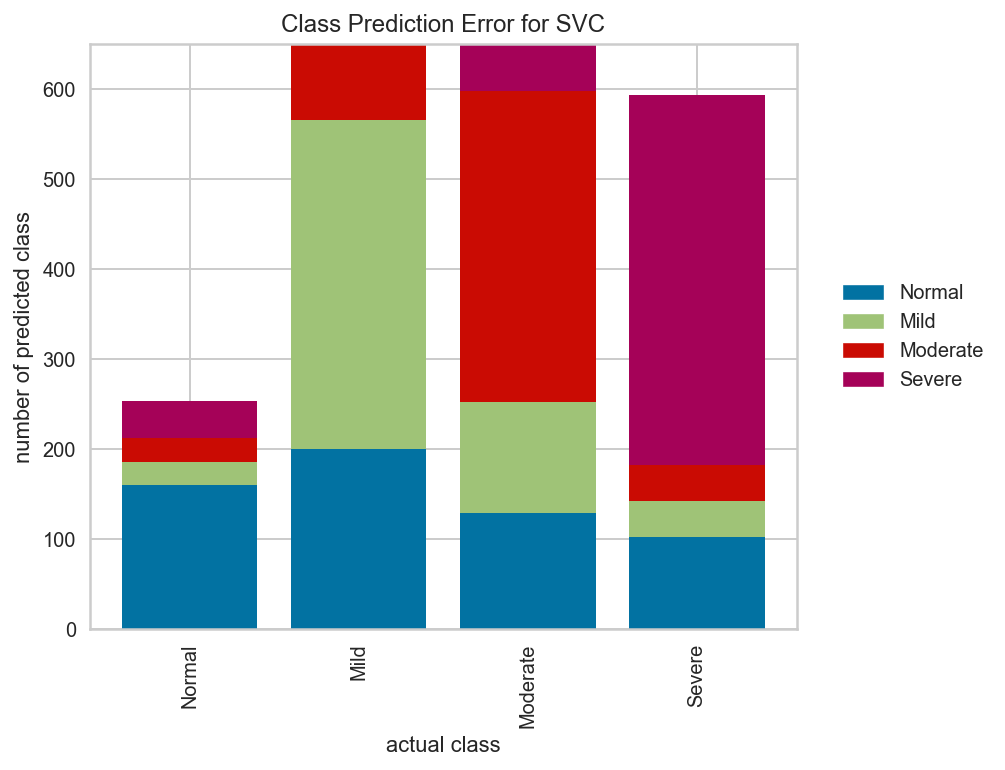

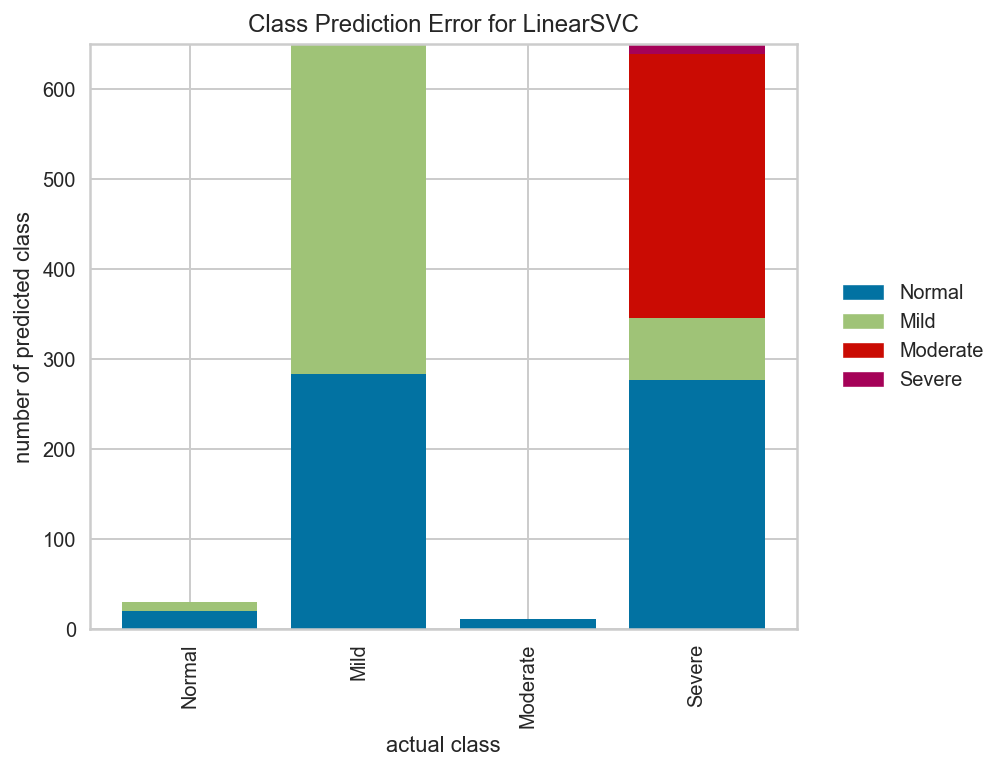

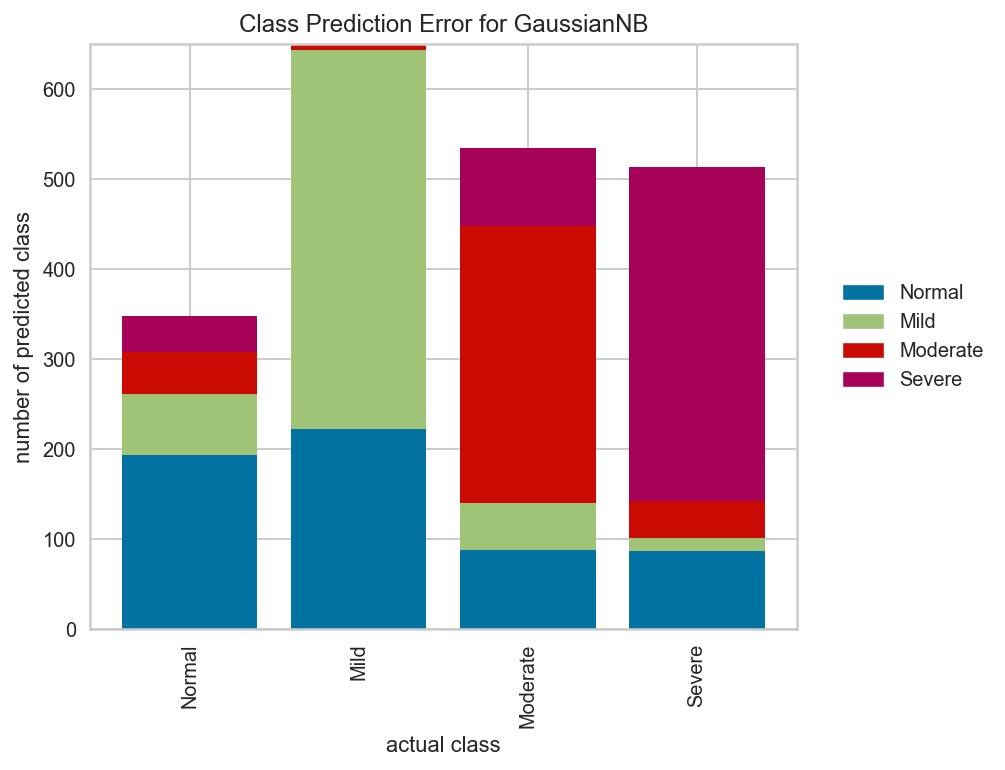

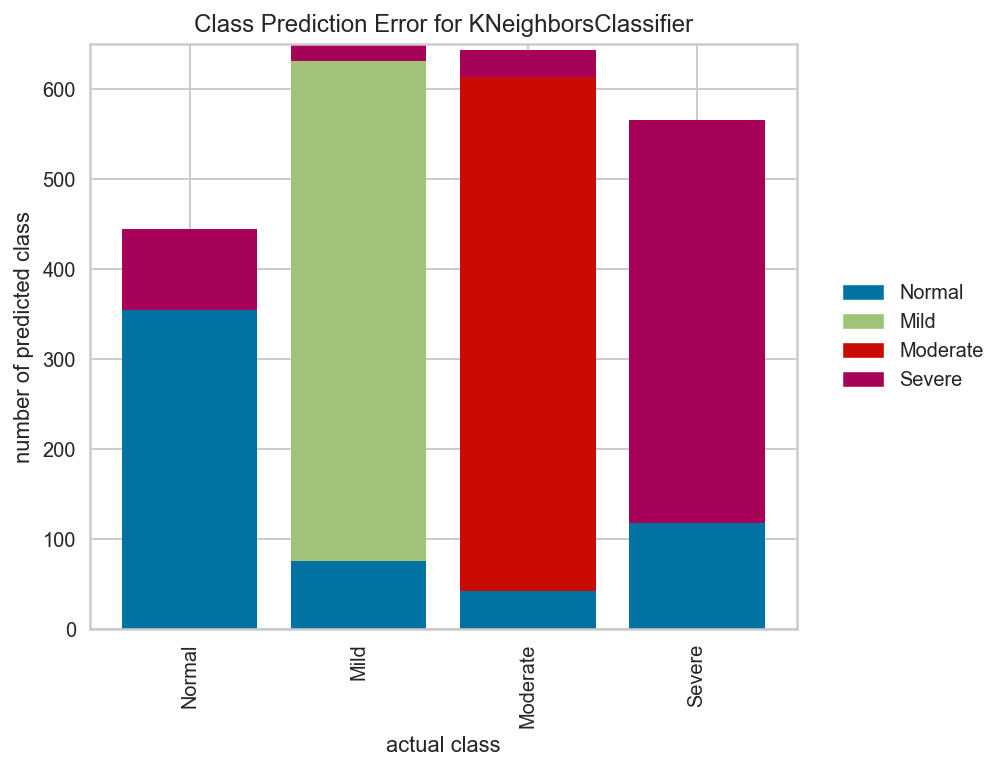

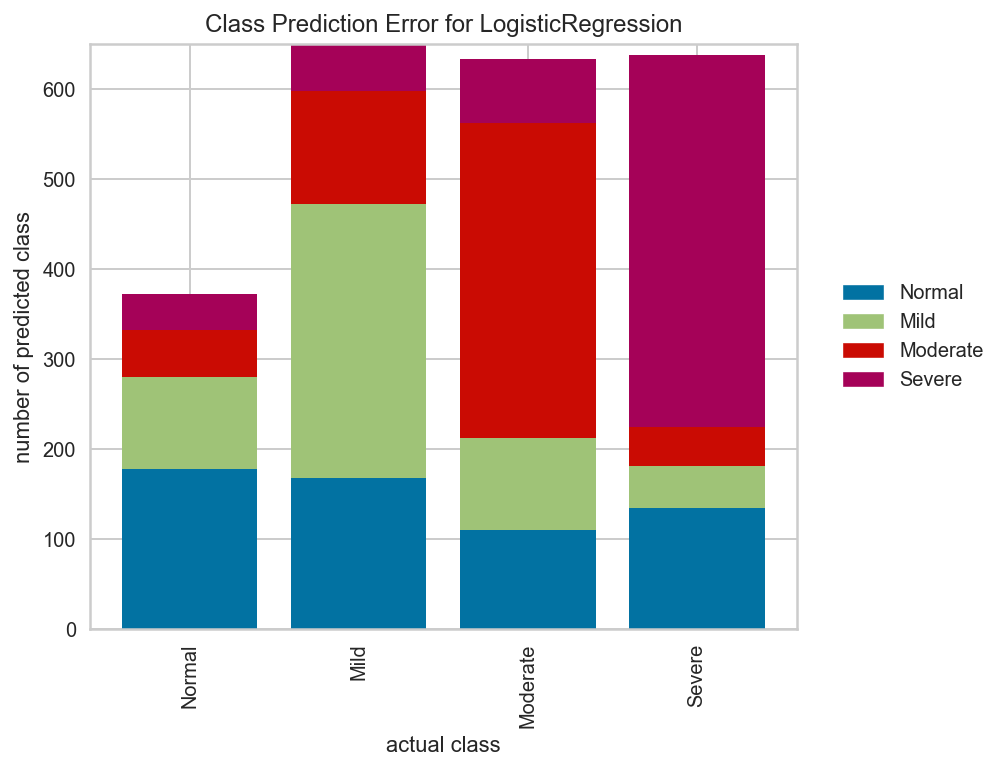

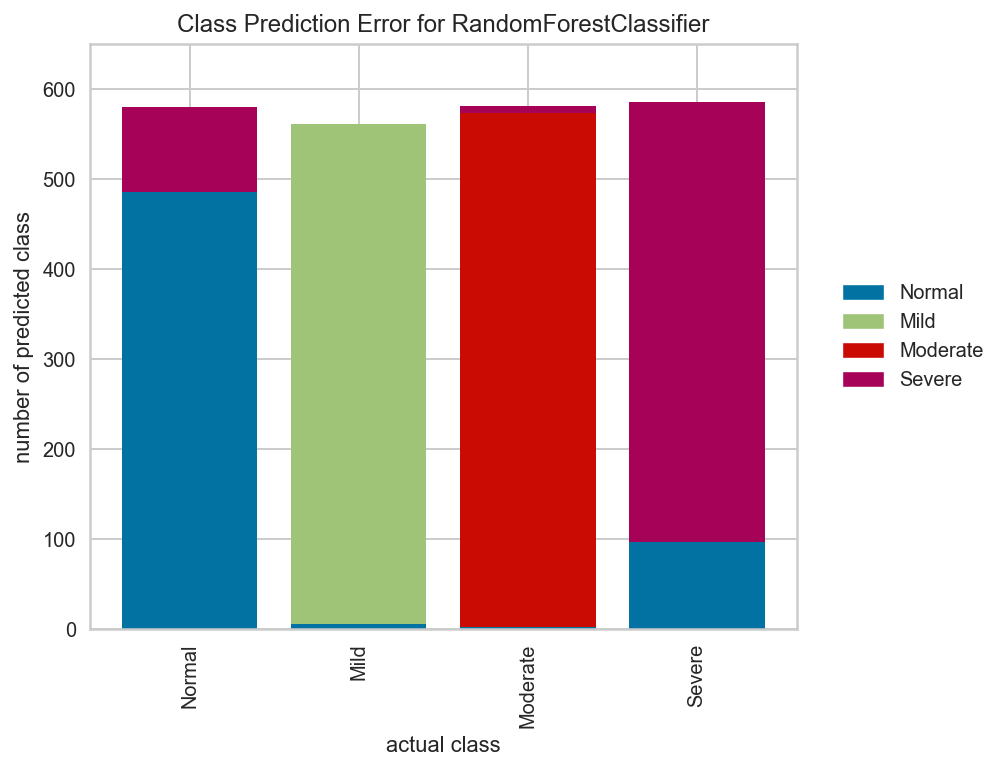

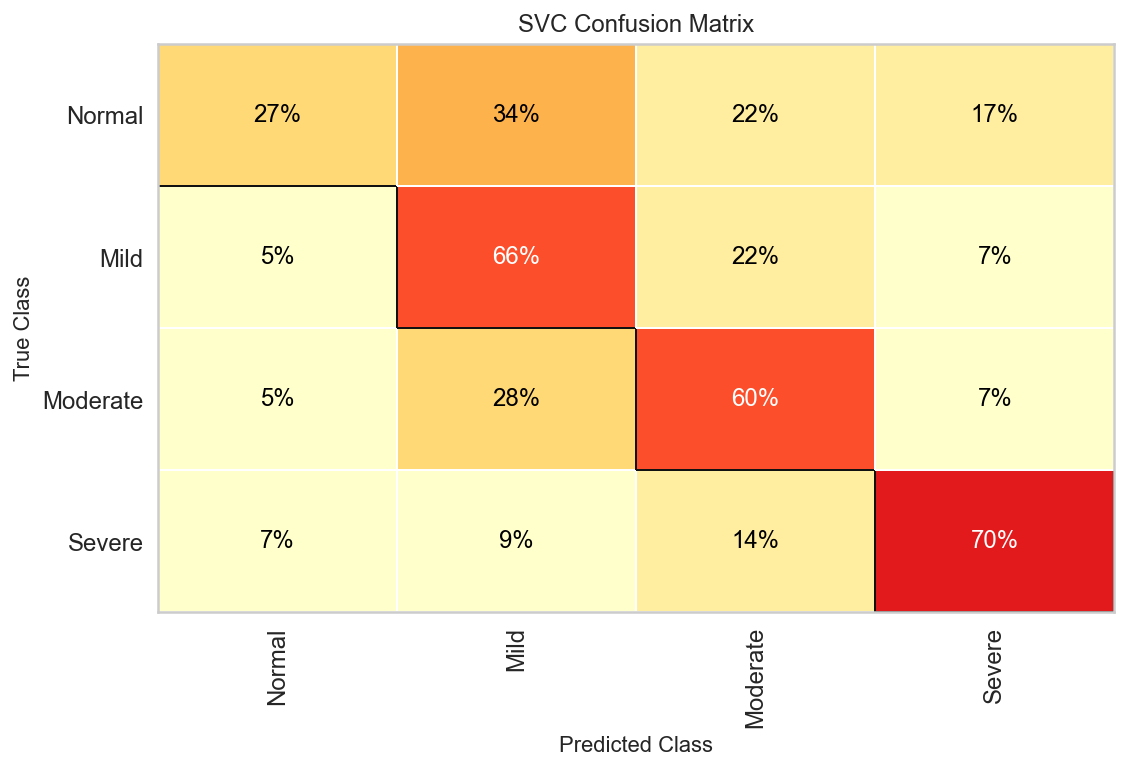

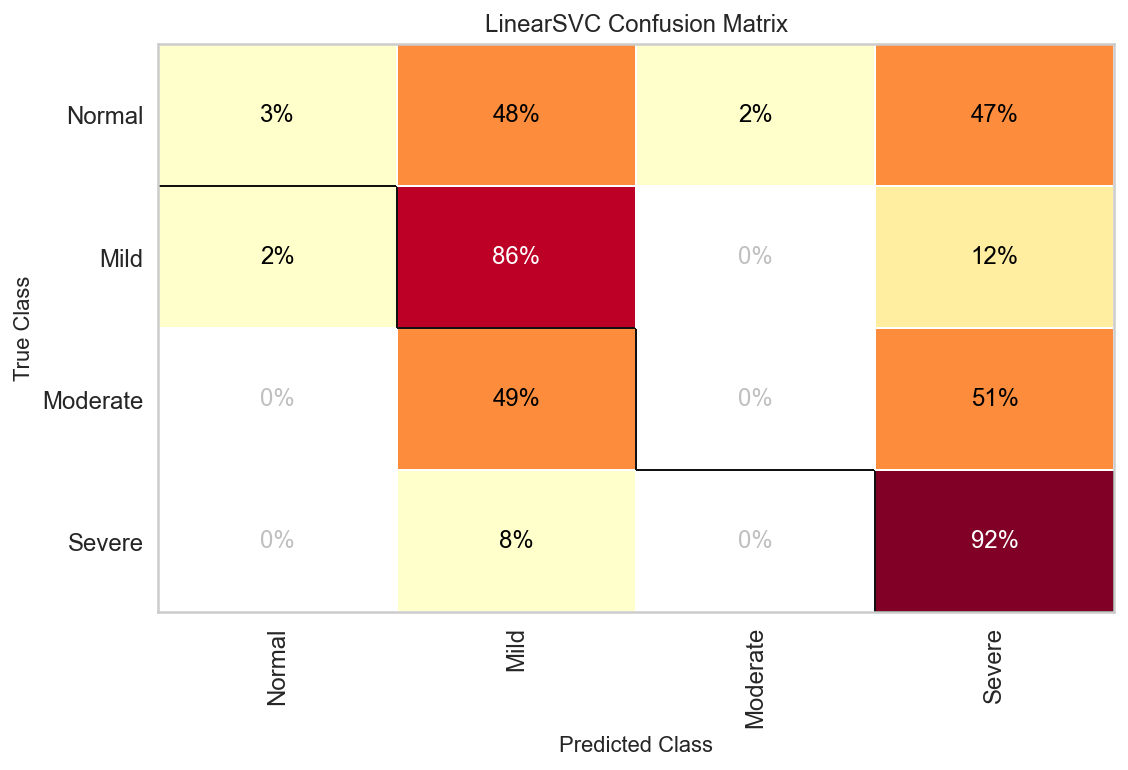

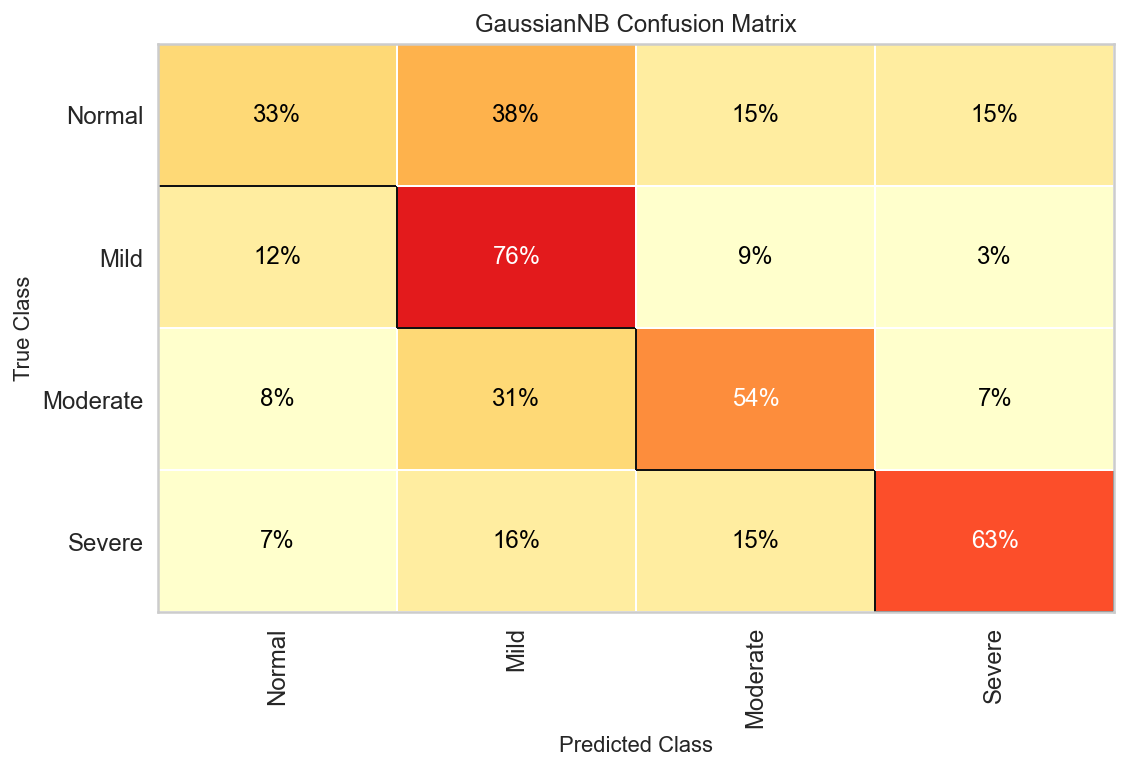

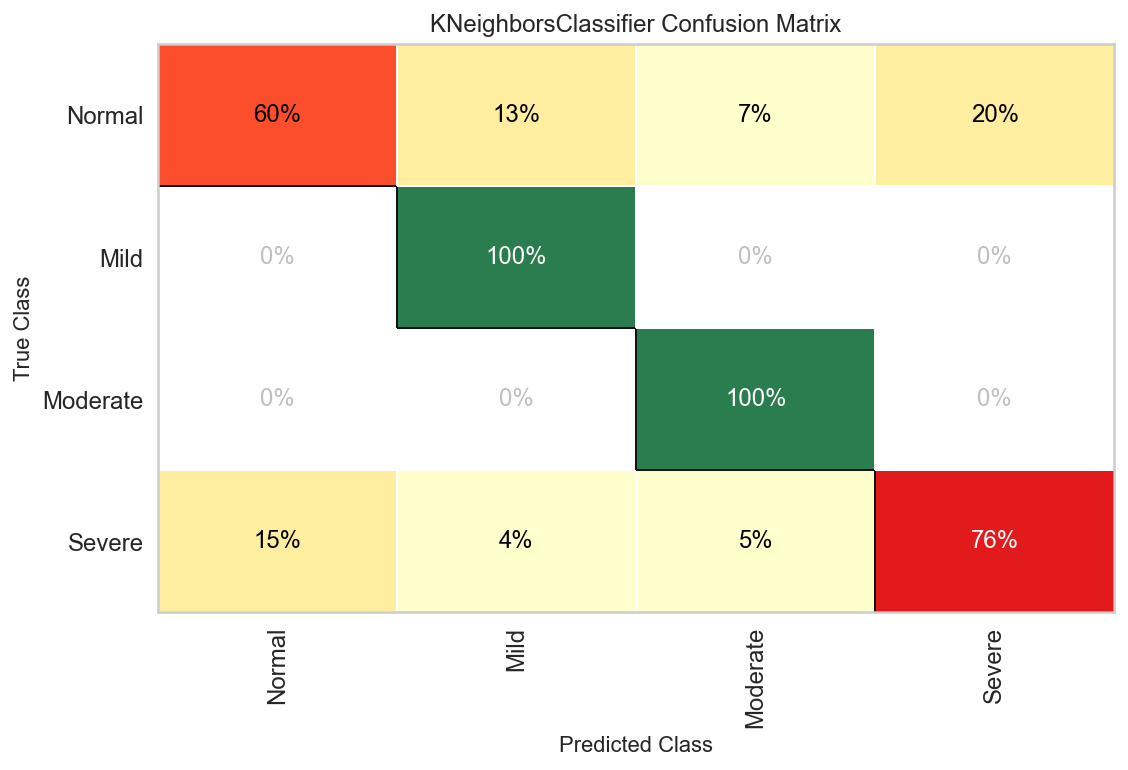

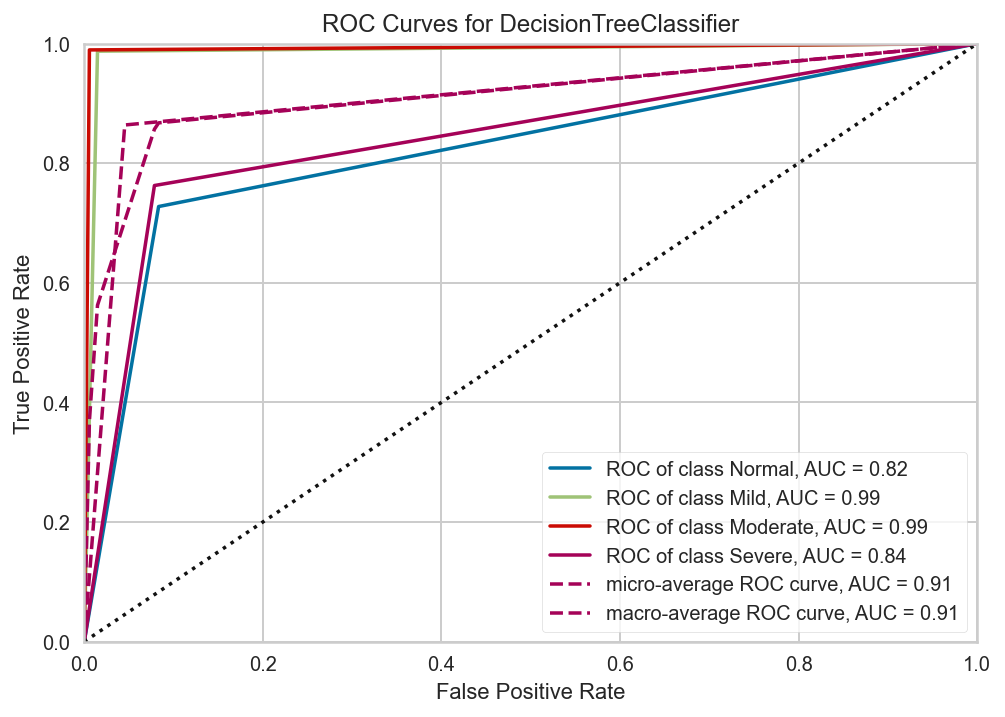

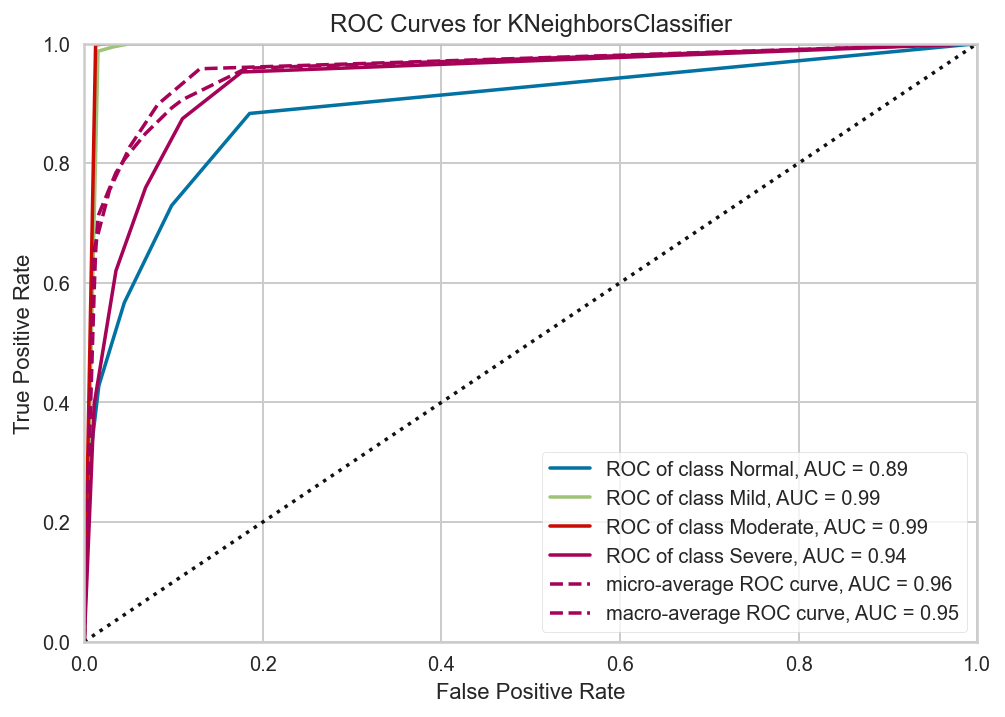

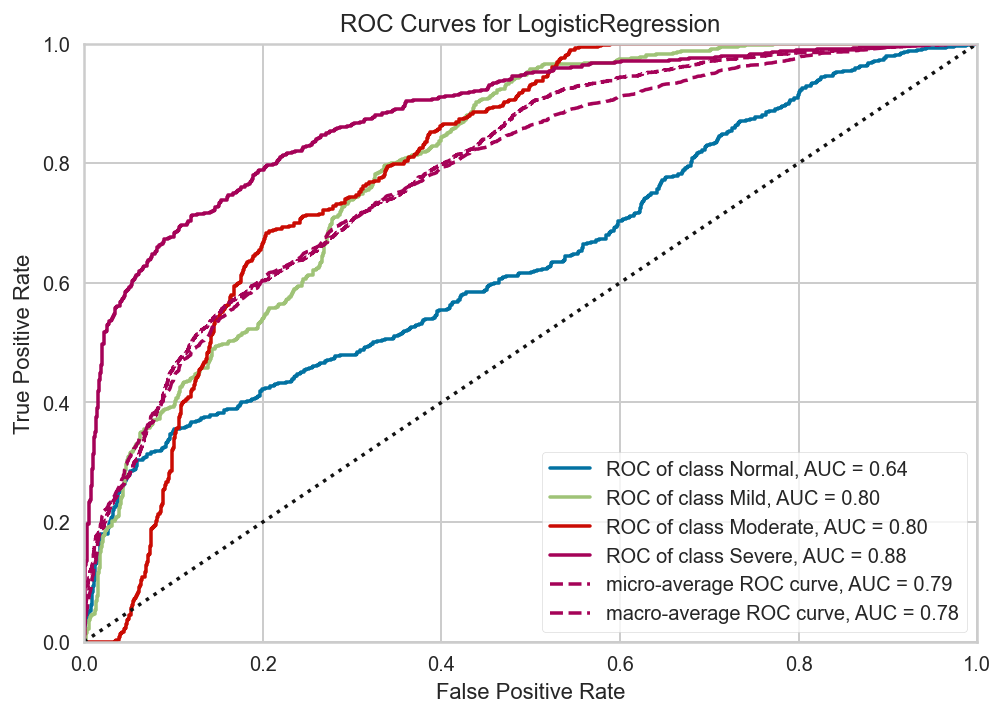

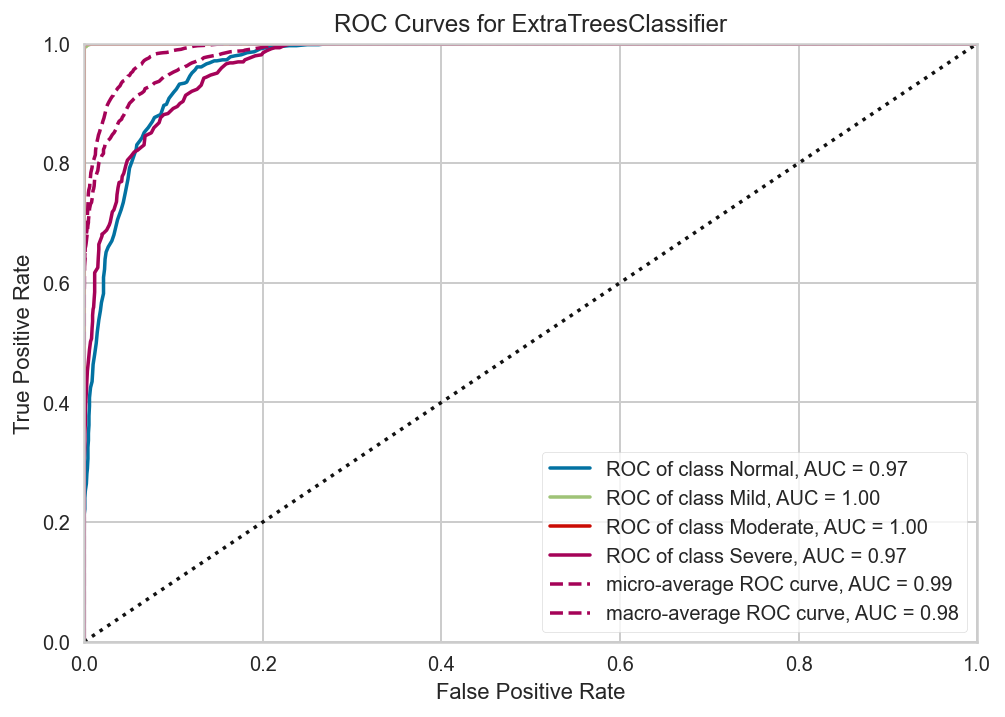

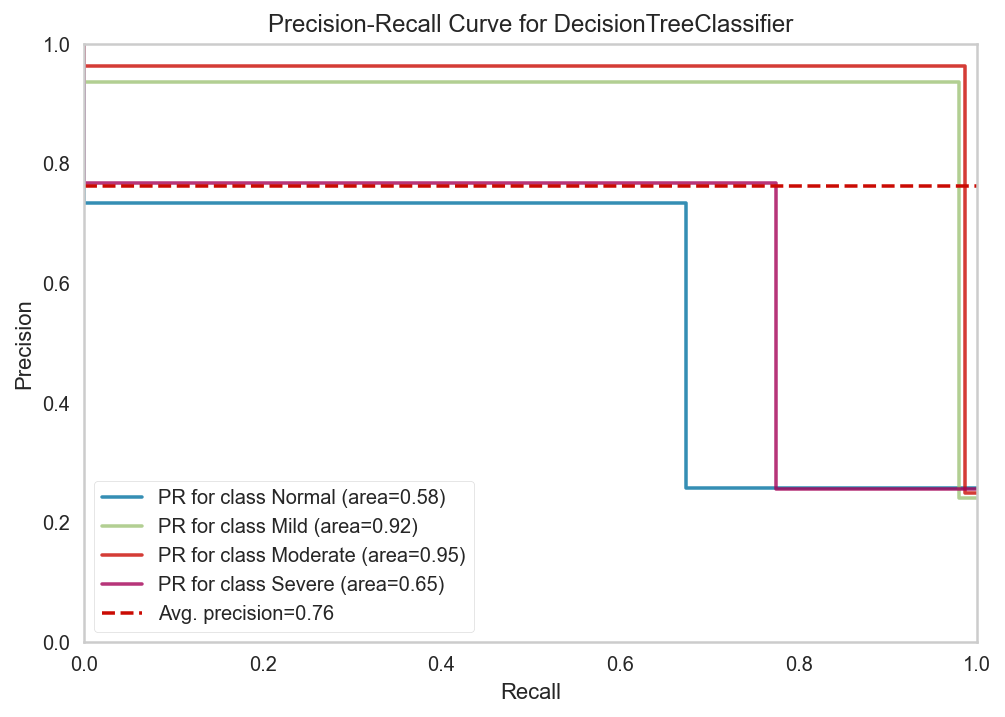

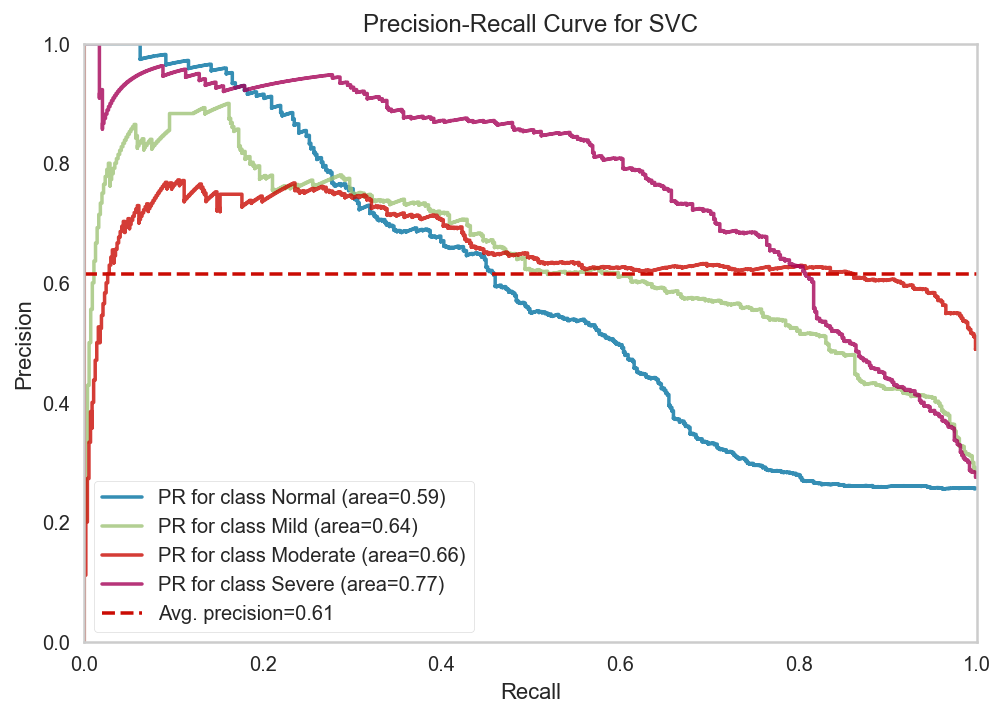

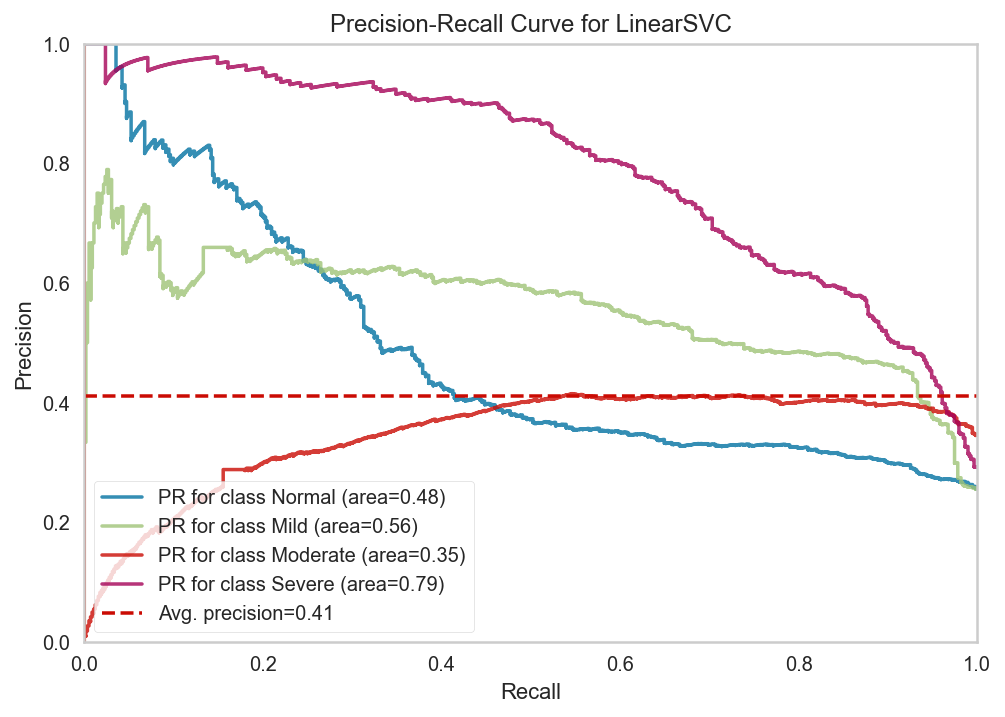

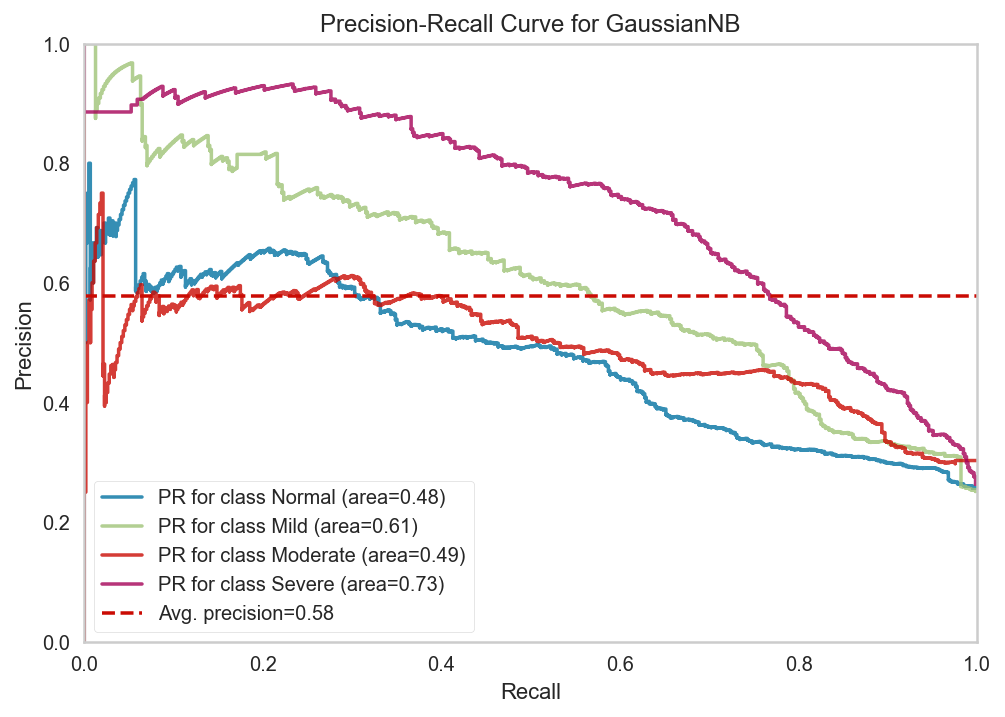

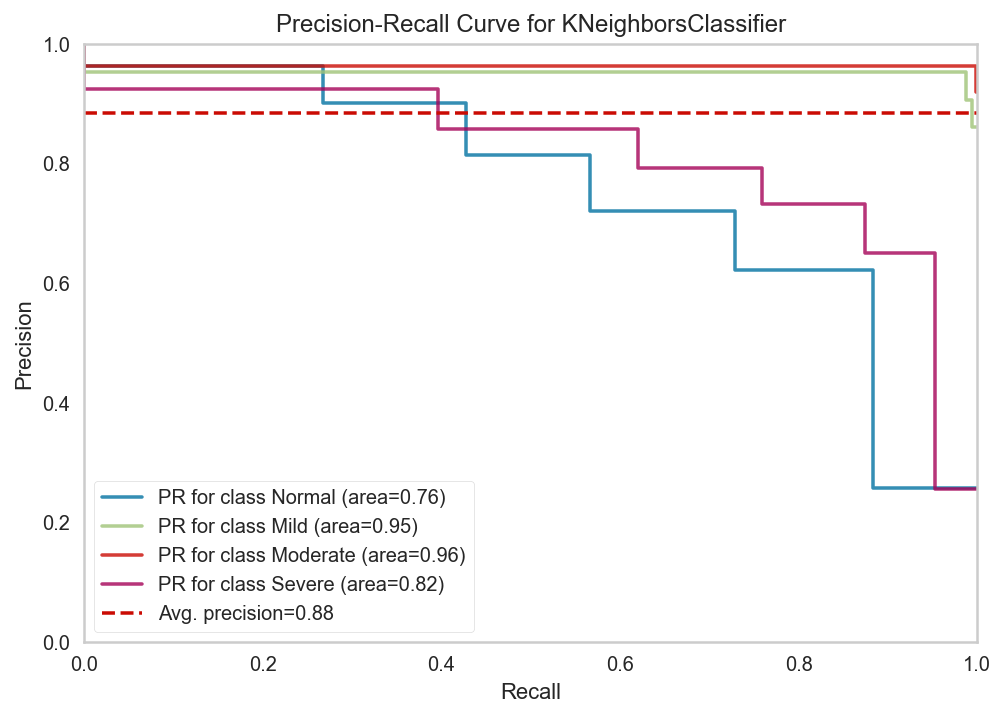

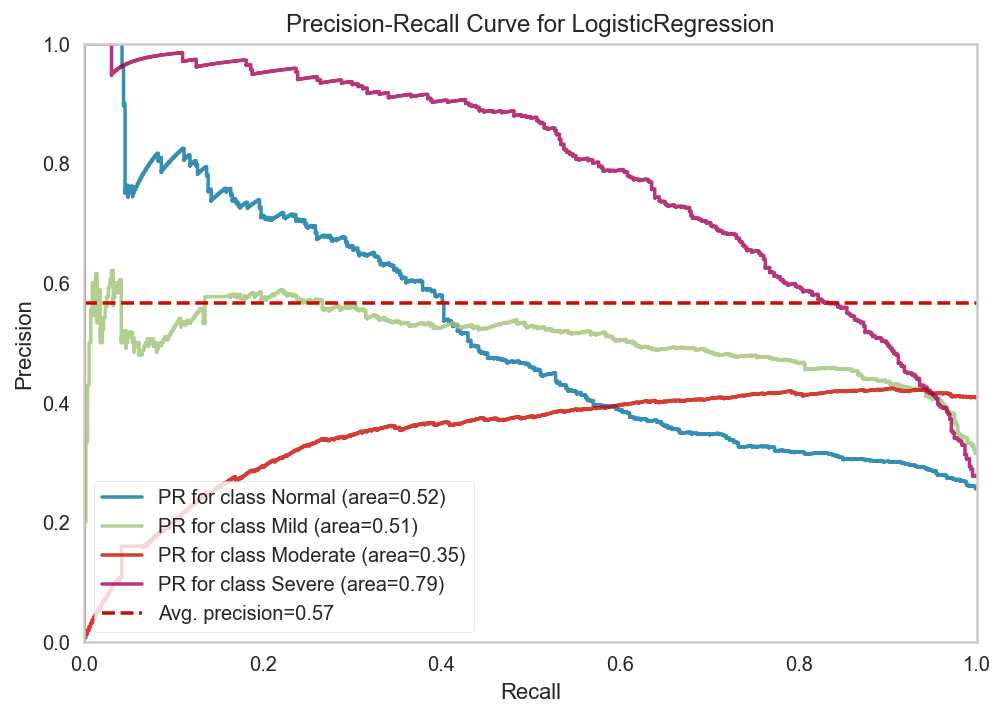

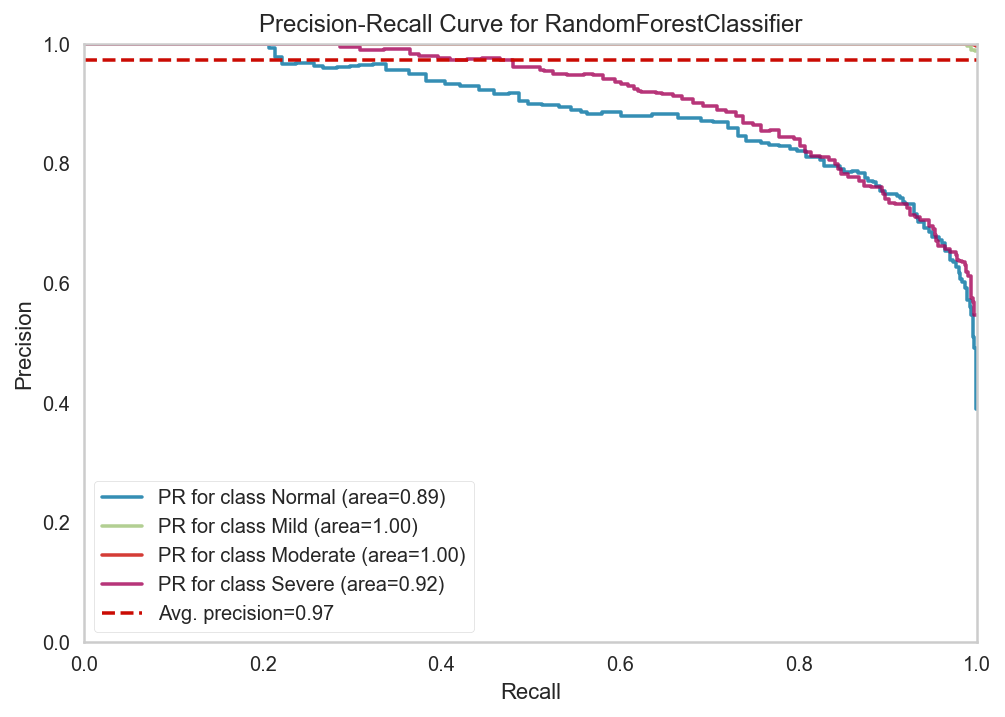

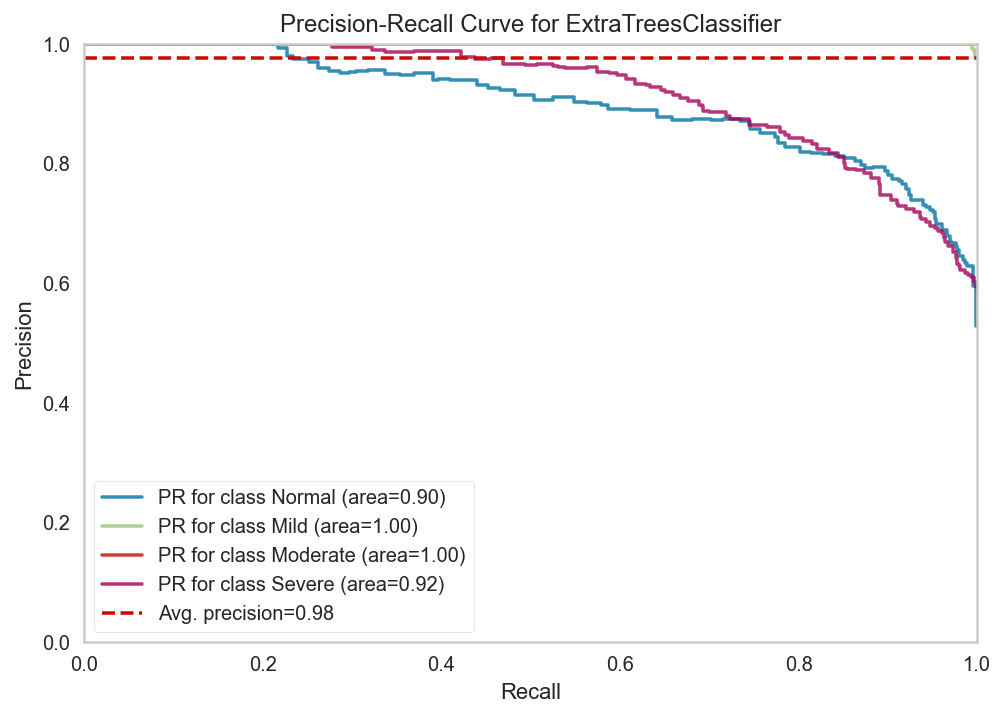

In [49]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [50]:
#Deploy aggregate metrics  
classifier_metrics()

DecisionTreeClassifier(random_state=0)
cohen_kappa_score: 0.819
log_loss: 4.699
zero_one_loss: 0.136
hemming_loss: 0.136
matthews_corrcoef: 0.819

------------------------------------------------------
SVC(random_state=0)
cohen_kappa_score: 0.409
log_loss: 0.000
zero_one_loss: 0.444
hemming_loss: 0.444
matthews_corrcoef: 0.418

------------------------------------------------------
LinearSVC(random_state=0)
cohen_kappa_score: 0.267
log_loss: 0.000
zero_one_loss: 0.551
hemming_loss: 0.551
matthews_corrcoef: 0.323

------------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.416
log_loss: 1.608
zero_one_loss: 0.439
hemming_loss: 0.439
matthews_corrcoef: 0.427

------------------------------------------------------
KNeighborsClassifier()
cohen_kappa_score: 0.782
log_loss: 1.672
zero_one_loss: 0.164
hemming_loss: 0.164
matthews_corrcoef: 0.785

------------------------------------------------------
LogisticRegression(random_state=0)
cohen_kappa_score: 0.386
log_

In [79]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classifier_BalancedData1_model.pkl', 'wb')

# dump information to that file
pickle.dump(base_model, file)